# Empirical Ontology

In [1]:
import os
os.chdir("/home/tales/dev/master/mdc_analysis/")
print("working dir", os.getcwd())

import pandas as pd
import ast

from src.poi_grabber import google_places
import matplotlib.pyplot as plt
# from src.entity.stop_region import StopRegionGroup

working dir /home/tales/dev/master/mdc_analysis


## Loading data...

In [2]:
def clean_types(types_list):
    if "point_of_interest" in types_list:
        types_list.remove("point_of_interest")
        
    if "establishment" in types_list:
        types_list.remove("establishment")
    
    return list(set(types_list))

In [3]:
types_list = google_places.load_all_google_places_data(valid_pois=True)["types"]
types_list = types_list.apply(clean_types)
print(len(types_list))
types_list.head()

41873


place_id
ChIJTcpEIDQujEcRfRIRizbvj4k    [local_government_office, accounting, finance]
ChIJPV-d_9dkjEcRh-AFXijs5H0                                           [store]
ChIJ6TtT3J1EjEcRdmsz6L2gHTU                                    [beauty_salon]
ChIJLZi4AC8ujEcRvSGJiRYVAk0                                          [health]
ChIJKTbDs6ygmkcRhp_reVwKcjc                                         [finance]
Name: types, dtype: object

## Co-occurrences

In [8]:
def list_co_ocurrences(types_list):
    co_ocurrences_list = []
    
    for types in types_list:
        #t#ypes.sort()
        if len(types) > 1:
            co_ocurrences_list.append({"types": str(types), "freq": 1})
        
    df = pd.DataFrame(co_ocurrences_list).groupby("types").apply(len).sort_values(ascending=False).to_frame()
    return df.rename(columns={0: 'freq'}).reset_index()

def types_co_ocurrences(types_list):
    co_ocurrences_list = []
    
    for types in types_list:
        for type_1 in types:
            for type_2 in types:
                if type_1 == type_2:
                    continue
                type_pair = [type_1, type_2]
                type_pair.sort()

                co_ocurrences_list.append({"types": str(type_pair), "freq": 1})
        
    df = pd.DataFrame(co_ocurrences_list).groupby("types").apply(len).sort_values(ascending=False).to_frame()
    return df.rename(columns={0: 'freq'}).reset_index()

def select(type_tag, table):
    selection = types_cooc.apply(lambda row : type_tag in row["types"], axis=1)
    
    return table[selection]
    

In [9]:
list_types_cooc = list_co_ocurrences(types_list.tolist())
print("len", len(list_types_cooc))
list_types_cooc.head(25)

len 768


,types,freq
0,"['food', 'restaurant']",3222
1,"['doctor', 'health']",2323
2,"['clothing_store', 'store']",1657
3,"['bus_station', 'transit_station']",1168
4,"['locality', 'political']",794
5,"['dentist', 'health']",791
6,"['bank', 'finance']",553
7,"['food', 'grocery_or_supermarket', 'store', 's...",502
8,"['jewelry_store', 'store']",473
9,"['food', 'store']",467


len 844


,types,freq
0,"['food', 'restaurant']",9662
1,"['food', 'store']",5792
2,"['doctor', 'health']",5052
3,"['clothing_store', 'store']",4182
4,"['home_goods_store', 'store']",2916
5,"['bus_station', 'transit_station']",2736
6,"['health', 'store']",2322
7,"['grocery_or_supermarket', 'store']",2098
8,"['food', 'grocery_or_supermarket']",2098
9,"['cafe', 'food']",1934


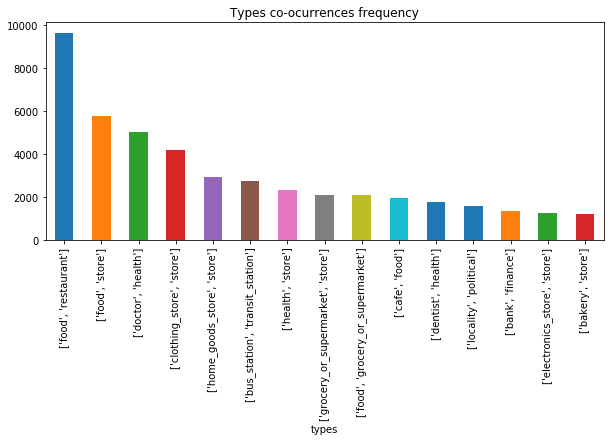

In [10]:
types_cooc = types_co_ocurrences(types_list.tolist())
print("len", len(types_cooc))
f, ax = plt.subplots(figsize=(10,4))
types_cooc.set_index("types")["freq"].head(15).plot.bar(title="Types co-ocurrences frequency")
types_cooc.head(10)

,types,freq
0,"['food', 'restaurant']",9662
1,"['food', 'store']",5792
8,"['food', 'grocery_or_supermarket']",2098
9,"['cafe', 'food']",1934
15,"['bakery', 'food']",1224
19,"['food', 'supermarket']",1102
20,"['bar', 'food']",1092
24,"['food', 'meal_takeaway']",954
39,"['convenience_store', 'food']",578
44,"['food', 'liquor_store']",556


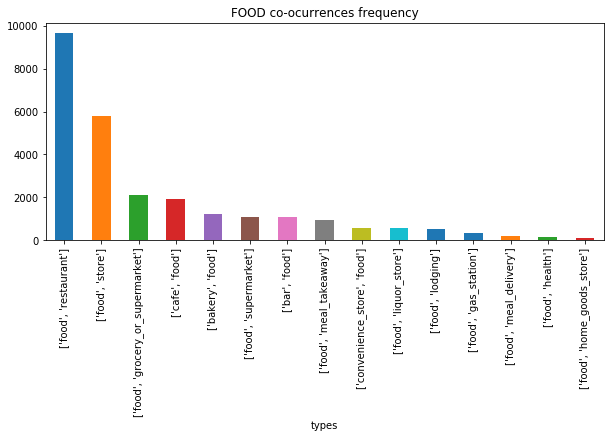

In [7]:
food = select("food", types_cooc)
f, ax = plt.subplots(figsize=(10,4))
food.set_index("types")["freq"].head(15).plot.bar(title="FOOD co-ocurrences frequency")
food.head(10)